<a href="https://colab.research.google.com/github/Dylro/WiDS-Project/blob/main/Copy_of_EmailSpamClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spam Classification**
We have many e-mail service providers which provide an in-built spam filter to protect you from malicious e-mails. We are going to try and make our very own spam filters.

We are going to train a Machine Learning Model which takes an e-mail (or rather the feature vector of an e-mail $x \in \mathbb{R}^n$ where $n$ is the dimension of the feature vector of the e-mail) and outputs $y \in \{0,1\}$ where $0$ denotes **not-spam** (also called ham) and $1$ denotes **spam**.

# **1. Loading Data**
We are going to use the open source dataset provided by the <a href="https://spamassassin.apache.org/old/publiccorpus/">SpamAssassin Public Corpus</a> which is one of the most famous datasets available. It classifies e-mails as '**Spam**' or '**Ham**' (Non-Spam)

In [ ]:
HAM_URL = "https://spamassassin.apache.org/old/publiccorpus/20030228_easy_ham.tar.bz2"
HAM_URL_2 = "https://spamassassin.apache.org/old/publiccorpus/20030228_easy_ham_2.tar.bz2"
HARD_HAM_URL = "https://spamassassin.apache.org/old/publiccorpus/20030228_hard_ham.tar.bz2"
SPAM_URL = "https://spamassassin.apache.org/old/publiccorpus/20030228_spam.tar.bz2"
SPAM_URL_2 = "https://spamassassin.apache.org/old/publiccorpus/20030228_spam_2.tar.bz2"
url_list = [HAM_URL, HAM_URL_2, HARD_HAM_URL, SPAM_URL, SPAM_URL_2]
DATASET_DIR = "dataset"

## 1.1. Downloading Compressed E-Mail Files

In [ ]:
# Command Line way to get the e-mail '.tar' files. 
# Now once we download the .tar files, we just need to unzip them.
!wget {HAM_URL}
!wget {HAM_URL_2}
!wget {HARD_HAM_URL}
!wget {SPAM_URL}
!wget {SPAM_URL_2}
"""Similarly write command line code to download the other URLs as well."""

--2022-01-14 11:01:23--  https://spamassassin.apache.org/old/publiccorpus/20030228_easy_ham.tar.bz2
Resolving spamassassin.apache.org (spamassassin.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to spamassassin.apache.org (spamassassin.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1612216 (1.5M) [application/x-bzip2]
Saving to: ‘20030228_easy_ham.tar.bz2’

20030228_easy_ham.t 100%[===================>]   1.54M  --.-KB/s    in 0.03s   

2022-01-14 11:01:23 (50.2 MB/s) - ‘20030228_easy_ham.tar.bz2’ saved [1612216/1612216]

--2022-01-14 11:01:23--  https://spamassassin.apache.org/old/publiccorpus/20030228_easy_ham_2.tar.bz2
Resolving spamassassin.apache.org (spamassassin.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to spamassassin.apache.org (spamassassin.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1077892 (1.0M) [application/x-bzip2]
Saving to: ‘20030228_easy_

'Similarly write command line code to download the other URLs as well.'

In [ ]:
import os
import tarfile

# Printing the Current Working Directory (CWD)
print(os.getcwd())

/content


## 1.2. Extracting the E-Mails from Compressed Files

In [ ]:
# Unzipping all the '.tar' e-mail files

def unzip_tar_files(tar_files):
    # Function stores extracted emails to './content/dataset'
    cwd=os.getcwd()
    new_dir=os.path.join(cwd,DATASET_DIR)
    print(new_dir)
    if not os.path.exists(new_dir):
      os.makedirs(new_dir)
    
    # Extracting .tar files for each easy_ham, easy_ham_2 etc.
    for tar_file in tar_files:
        with tarfile.open(tar_file, 'r:bz2') as f:
            f.extractall(path=new_dir)

tar_data_files = [url.split('/')[-1] for url in url_list]
print(tar_data_files)
unzip_tar_files(tar_data_files)

['20030228_easy_ham.tar.bz2', '20030228_easy_ham_2.tar.bz2', '20030228_hard_ham.tar.bz2', '20030228_spam.tar.bz2', '20030228_spam_2.tar.bz2']
/content/dataset


## 1.3. Command Line Interface

Instead of writing such a difficult to read code above, we could simply 'untar' our files using **Colab's Command Line Interface (CLI)**
 
Using $!$ in front of a command in a Colab/Jupyter Cell runs the command as a Command Line command.

```
!tar xvjf 20030228_easy_ham.tar.bz2
!tar xvjf 20030228_easy_ham_2.tar.bz2
!tar xvjf 20030228_hard_ham.tar.bz2  
!tar xvjf 20030228_spam.tar.bz2
!tar xvjf 20050311_spam_2.tar.bz2
```
<br>

The above is the same as writing
```
!tar xvjf {HAM_URL.split('/')[-1]}
!tar xvjf {HAM_URL_2.split('/')[-1]}
!tar xvjf {HARD_HAM_URL.split('/')[-1]}
!tar xvjf {SPAM_URL.split('/')[-1]}
!tar xvjf {SPAM_URL_2.split('/')[-1]}
```
<br>

But now, the above Extracted Data Files are stored in folders in the Current Working Directory (CWD), thus we move these files to another directory
```
!mv easy_ham {DATASET_DIR}  
!mv easy_ham_2 {DATASET_DIR}
!mv hard_ham {DATASET_DIR}
!mv spam {DATASET_DIR}
!mv spam_2 {DATASET_DIR}
```
<br>

Now for something even more amazing! The above two code chunks can be further compressed into just 5 lines of Command Line code.
```
!tar -C {DATASET_DIR} xvjf {HAM_URL.split('/')[-1]}
!tar -C {DATASET_DIR} xvjf {HAM_URL_2.split('/')[-1]}
!tar -C {DATASET_DIR} xvjf {HARD_HAM_URL.split('/')[-1]}
!tar -C {DATASET_DIR} xvjf {SPAM_URL.split('/')[-1]}
!tar -C {DATASET_DIR} xvjf {SPAM_URL_2.split('/')[-1]}
```
<br>

My purpose of telling you all this is that in many cases you'll see software engineers use the **Command Line Interface** to do a lot of tasks instead of a **Graphical User Interface** which of course feels more intuitive (The classic old **CLI vs GUI debate**).

As shown above, for general purpose use, of course GUIs dominate because they are much more intuitive (the Windows OS/ Mac OS UI is a GUI!) but for engineering problems, where we require efficiency and speed, knowledge of CLI absolutely demolishes GUI. This is one of the key takeaways from this section.

## 1.4. Creating the Dataset

In [ ]:
# Creating our dataset
def load_files(path):
    file_names = os.listdir(path)
    # List of strings containing the contents of the e-mails
    emails_data = []

    # Iterating through raw e-mails and converting them to string
    for file_name in file_names:
        with open(os.path.join(path, file_name), 'rb') as f:
            raw_byte_data = f.read() 
            str_data = raw_byte_data.decode('utf-8', errors='ignore')
            emails_data.append(str_data)

    return emails_data

easy_ham = load_files(f'/content/{DATASET_DIR}/easy_ham')
easy_ham_2 = load_files(f'/content/{DATASET_DIR}/easy_ham_2')
hard_ham = load_files(f'/content/{DATASET_DIR}/hard_ham')
spam = load_files(f'/content/{DATASET_DIR}/spam')
spam_2 = load_files(f'/content/{DATASET_DIR}/spam_2')


In [ ]:
import sklearn.utils
import numpy as np

# I've left out hard_ham, you can choose to include it though

X = easy_ham + easy_ham_2 + spam + spam_2 # + hard_ham

# y denotes the label of the data - whether the mails are spam or ham (non-spam)
# 1 - Spam , 0 - Ham (Non-Spam)
y =  np.concatenate([np.zeros(len(easy_ham)), np.zeros(len(easy_ham_2)), 
                    np.ones(len(spam)), np.ones(len(spam_2))]) 
# y =  np.concatenate([np.zeros(len(easy_ham)), np.zeros(len(easy_ham_2)), 
#                    np.ones(len(spam)), np.ones(len(spam_2)), np.zeros(len(hard_ham))])

# Shuffling our dataset
from sklearn.utils import shuffle
X, y = shuffle(X, y)

In [ ]:
print(len(easy_ham),len(easy_ham_2),len(hard_ham),len(spam),len(spam_2))


2501 1401 251 501 1398


In [ ]:
print(len(X), len(y))

5801 5801


# **2. Data Pre-processing**


##2.1. Removing the E-Mail Header
For the purpose of this project, we are only going to deal with the body of the e-mails and not any other kind of meta-data. That is, we are not going to use any information about the sender, sender's location, subject of the e-mail, sending time, IP Address etc. Of course, including this information would help us in creating better heuritstic rules and more accurate models, but they would complicate the feature extraction process

In [ ]:
def removeHeader(X, y):
    X_body = []
    y_body = []

    for i, email in enumerate(X):
        # If at all some e-mails are corrupted, hence need to use try-except
        try:
            header_start = email.find('\n\n')
            email = email[header_start:]
            X_body.append(email)
            y_body.append(y[i])
        except:
            print(f"Excluded Mail No. {i}")

    return X_body, np.array(y_body)

X, y = removeHeader(X, y)

In [ ]:
len(X), len(y)

(5801, 5801)

##2.2. Pre-processing E-Mail Body
Before starting on a machine learning task, it is usually insightful to take a look at examples from the dataset. The figure below shows a sample email that contains a URL, an email address (at the end), numbers, and dollar
amounts.

<img src="https://github.com/kunind27/WiDS-Project/blob/main/email.png?raw=1" width="700px" />

While many emails would contain similar types of entities (e.g., numbers, other URLs, or other email addresses), the specific entities (e.g., the specific URL or specific dollar amount) will be different in almost every
email. Therefore, one method often employed in processing emails is to “normalize” these values, so that all URLs are treated the same, all numbers are treated the same, etc. For example, we could replace each URL in the
email with the unique string “httpaddr” to indicate that a URL was present.

This has the effect of letting the spam classifier make a classification decision based on whether any URL was present, rather than whether a specific URL was present. This typically improves the performance of a spam classifier, since spammers often randomize the URLs, and thus the odds of seeing any particular URL again in a new piece of spam is very small. 

In the function `processEmail` below, we want to implement the following email preprocessing and normalization steps:

- **Lower-casing**: The entire email is converted into lower case, so that captialization is ignored (e.g., IndIcaTE is treated the same as Indicate).

- **Stripping HTML**: All HTML tags are removed from the emails. Many emails often come with HTML formatting; we remove all the HTML tags, so that only the content remains.

- **Normalizing URLs**: All URLs are replaced with the text “httpaddr”.

- **Normalizing Email Addresses**:  All email addresses are replaced with the text “emailaddr”.

- **Normalizing Numbers**: All numbers are replaced with the text “number”.

- **Normalizing Dollars**: All dollar signs ($) are replaced with the text “dollar”.

- **Word Stemming**: Words are reduced to their stemmed form. For example, “discount”, “discounts”, “discounted” and “discounting” are all replaced with “discount”. Sometimes, the Stemmer actually strips off additional characters from the end, so “include”, “includes”, “included”, and “including” are all replaced with “includ”.

- **Removal of non-words**: Non-words and punctuation have been removed. All white spaces (tabs, newlines, spaces) have all been trimmed to a single space character.

The result of these preprocessing steps is shown in the figure below. 

<img src="https://github.com/kunind27/WiDS-Project/blob/main/email_cleaned.png?raw=1" alt="email cleaned" style="width: 600px;"/>

While preprocessing has left word fragments and non-words, this form turns out to be much easier to work with for performing feature extraction.

**References**:
1. Week 6 - Machine Learning System Design - Building a Spam Classifier <a href="https://www.coursera.org/learn/machine-learning"> Machine Learning MOOC on Coursera by Andrew Ng</a>
1. Programming Exercise 6 of <a href="https://www.coursera.org/learn/machine-learning"> Machine Learning MOOC on Coursera by Andrew Ng</a>

**Implementation Tip** : For many of the above mentioned tasks for data pre-processing, I (or rather Andrew Ng XD) have (has) used Regular Expressions (RegEx). While they can be really complicated to understand, they are relatively easy to learn and can be really powerful if used well. Additionally, many of the pre-processing steps we do here are fairly common and a really simple web search can give answers to most of these. But I would really recommend you to go through this **amazing short tutorial** about regular expressions.

Link to the tutorial - https://regexone.com/

In [ ]:
from nltk.stem import PorterStemmer

# Importing Regular Expressions (re) to handle the above mentioned pre-processing tasks
# You can even choose to do it with Python's inbuilt String library 
import re
import string

def preprocessEmail(email_contents, verbose = False):
    """Preprocesses the body of an email and returns a list of indices 
    of the words contained in the email.    
    
    Parameters
    ----------
    email_contents : str
        A string containing one email. 
    
    verbose : bool
        If True, print the resulting email after processing.
    
    Returns
    -------
    processed_email : list
        A list of strings/words containing the contents of a processed email.
    """
    # ========================== Preprocess Email ===========================
    # Turns all the elements to lower case
    email_contents =email_contents.lower()
    
    # Strip all HTML Tags (Regex)
    # Looks for any expression that starts with < and ends with > and does not 
    # have any < or > in the tag and replace it with a space
    email_contents =re.compile("<[^>]*>").sub('', email_contents)

    # Handle Numbers (Regex)
    # Look for one or more characters between 0-9 and replace them with ' number '
    email_contents = re.compile('[0-9]+').sub('number', email_contents)

    # Handle URLS (Regex)
    # Look for strings starting with http:// or https:// and replace the URL 
    # with ' httpaddr '
    email_contents = re.compile('(http|https)://[^\s]*').sub('httpaddr', email_contents)

    # Handle Email Addresses (Regex)
    # Look for strings with @ in the middle, not surrounded by any whitespace &
    # replace it with ' emailaddr '
    email_contents = re.compile('[^\s]+@[^\s]+').sub('emailaddr', email_contents)
    
    # Handle $ sign (Regex) and replace it with ' dollar '
    email_contents = re.compile('[$]+').sub('dollar', email_contents)
    
    # Get rid of any punctuation
    email_contents = email_contents.translate(str.maketrans('', '', string.punctuation))

    # Remove any empty word string
    email_contents =  re.sub(r"(?<=\n)\W+", '', email_contents)
    
    # Stem the email contents word by word
    stemmer = PorterStemmer()
    processed_email = []
    email_contents=email_contents.split()
    for word in email_contents:
        # Remove any remaining NON-alphanumeric characters in word and
        # substitute it with "" (the null string)
        word = re.compile('[^a-zA-Z\d\s:]').sub('', word).strip()
        word=stemmer.stem(word)
        """Write code to stem the word and append it to processed_email list."""
        processed_email.append(word)
        if len(word) < 1:
            continue

    if verbose:
        print('----------------')
        print('Processed email:')
        print('----------------')
        print(' '.join(processed_email))
    return processed_email

In [ ]:
X_preprocessed = []
from collections import Counter
word_counter = Counter()


print(word_counter)
"""
Write code here to take all the mails from our dataset, process them and append
them into an empty list X_preprocessed
"""

for email in X:
  email_process=preprocessEmail(email,verbose= False)
  email_process_str = ' '.join(map(str, email_process))#converting our processed emails from list to string
  X_preprocessed.append(email_process_str)
for s in X_preprocessed:#Counting the frequency of each word used in our emails
    word_counter.update(s.split())
    

Counter()



## 2.3 Extracting Features from Emails


###2.3.1 Vocabulary Creation
We haven't yet defined what our vocabulary is yet. Once we have pre-processed our emails, we select the **Top** $K$ highest frequency (highest occuring) words (which are stemmed) in our e-mail dataset to act as our vocabulary. That is we only consider these $K$ most frequently occuring words to describe our email contents / their feature vector. Here $K$ is a hyperparameter. A good starting point for $K$ can be around $1500$ to $2000$.

**Very Important** : A lot of people make a mistake of NOT excluding **Stop Words** from their vocabulary. Stop Words are those words whose presence is gramatically important but NOT semantically. That is, these words do not add much to the context of a given document/ sentence. Eg. 'the', 'is', 'a', 'an', 'on', 'at', 'are' etc.

There is no single universal list of stop words used by all natural language processing tools, nor any agreed upon rules for identifying stop words, and indeed not all tools even use such a list. But there is general consensus on a lot of words falling into the category of Stop Words. Many NLP libraries have a list of their own stop words.

**Implementation Tip** : Instead of executing this creation of vocabulary separately, we can save our time and modify the previous code cell in such a way that we can directly/ indirectly get a vocabulary list or atleast a frequency value for each encountered stemmed word.

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

english_stopwords = stopwords.words('english')
i = 0
print(english_stopwords[i])
print(len(english_stopwords))
print(english_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
i
179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both

In [ ]:
def createVocabulary(X_preprocessed):
    vocabulary_list = []
    vocabulary_list_unstopped=sorted(word_counter, key=word_counter.get, reverse=True)[:1700]#picking the most feequently occuring top 1700 words from our word counter
    vocabulary_list=list(set( vocabulary_list_unstopped)-set(english_stopwords))#removing stopwords from our top 1700 list 
    return vocabulary_list

vocabulary_list = createVocabulary(X_preprocessed)
print(vocabulary_list)
len(vocabulary_list)


['improv', 'commiss', 'necessari', 'kept', 'land', 'v', 'rang', 'abov', 'disabl', 'string', 'ms', 'colleg', 'known', 'friend', 'bottl', 'theori', 'vendor', 'larger', 'coupl', 'sequenc', 'eye', 'close', 'anim', 'aug', 'materi', 'owner', 'method', 'write', 'star', 'token', 'useless', 'enemi', 'otherwis', 'polic', 'us', 'ye', 'pacif', 'newslett', 'loss', 'expert', 'intro', 'sender', 'month', 'group', 'applic', 'spec', 'beberg', 'motiv', 'congress', 'window', 'reason', 'browser', 'classifi', 'total', 'tip', 'daili', 'singl', 'un', 'exchang', 'feder', 'herba', 'intend', 'joe', 'space', 'correct', 'procedur', 'justin', 'dr', 'august', 'safe', 'feel', 'bulk', 'chanc', 'attent', 'wednesday', 'fulli', 'le', 'research', 'world', 'account', 'telecom', 'left', 'need', 'tablet', 'appar', 'keyboard', 'win', 'web', 'articl', 'themselv', 'africa', 'extens', 'option', 'said', 'host', 'wrote', 'thought', 'terror', 'strong', 'follow', 'file', 'monthli', 'balanc', 'la', 'guy', 'night', 'numbernumbernumber

1595

###2.3.2. One Hot Encoding
We will now implement a basic **One Hot Encoding** feature extraction that converts each email into a vector in $\mathbb{R}^n$. For this exercise, you will be using $\mbox{n = number of words in vocabulary list}$. Specifically, the feature $x_i \in \{0, 1\}$ for an email corresponds to whether the $i^{th}$ word in the dictionary occurs in the email. That is, $x_i = 1$ if the $i^{th}$ word is in the email and $x_i = 0$ if the $i^{th}$ word is not present in the email.

Thus, for a typical email, this feature would look like:

$$ x = \begin{bmatrix} 
0 & \dots & 1 & 0 & \dots & 1 & 0 & \dots & 0 
\end{bmatrix}^T \in \mathbb{R}^n
$$

You should now complete the code in the function `emailFeatures` to generate a feature vector for an email, given the `email_content`.

In [ ]:
def emailFeatures(email_content, vocabulary_list):
  
      

 

    """
    Takes in a email_content vector and produces a feature vector from the word 
    indices. 
    
    Parameters
    ----------
    email_content : list
        A list of stemmed words present in the processed e-mail.
    
    Returns
    x : list 
        The computed feature vector.
    
    x[i] = 1 when word i
    is present in the email. Concretely, if the word 'the' (say,
    index 60) appears in the email, then x[60] = 1. The feature
    vector should look like:
        x = [ 0 0 0 0 1 0 0 0 ... 0 0 0 0 1 ... 0 0 0 1 0 ..]
    """
    # Total number of words in the dictionary
    n = len(vocabulary_list)

    # You need to return the following variables correctly.
    x = np.zeros(n)

    # ===================== YOUR CODE HERE ======================

    word_indices = [];
    for word in email_content:#in this loop we create a list of indices (for our email) of only those words are common in the vocabulary list and email
      for i in range(0,len(vocabulary_list)-1):
        if (word==vocabulary_list[i]):
          word_indices.append(i)
    for i in range(0,len(vocabulary_list)-1):#creating a feature vector for the email
      for j in range(0,len(word_indices)-1):
        if (i==word_indices[j]):
          x[i]=1

    
    # ===========================================================
    
    return x

In [ ]:
X_processed = np.zeros((np.array(X).shape[0], len(vocabulary_list)))
"""Write code to create X_processed - a NumPy array of size m*n where 'm' is the 
number of e-mails in our dataset and 'n' is the size of our vocabulary
from X_preprocessed"""
count=0
for email in X_preprocessed:
  X_processed[count]=emailFeatures(email.split(),vocabulary_list)
  count=count+1

### 2.3.3. Other Feature Extraction Strategies
The above One-Hot Encoding Feature Extraction strategy is nice, but is very simple and doesn't work well for other complicated datasets/ NLP tasks. For eg., it does not at all take into account the frequency of each vocabulary word in the mail or their relative positioning, or even their global occurrence in the entire e-mail corpus (in the train set.)


Thus there have been many other proposals to use different kinds of word embeddings. Some of them are:
1. Token Frequency (TF)
1. Inverse Document Frequency (IDF)
1. Word Embeddings (Bag of Words, GloVe, word2vec etc.)

You could try these embeddings as an optional part of the project to see how the accuracy/ F1 Score of the ML model changes! Most of them have ready made implementations in the form of libraries

**References**:
1. https://towardsdatascience.com/word-embedding-techniques-word2vec-and-tf-idf-explained-c5d02e34d08
1. https://towardsdatascience.com/how-to-turn-text-into-features-478b57632e99
1. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

# **3. Exploratory Data Analysis & t-SNE**

## 3.1. Data Analysis
In general, the main purpose of any kind of data analysis is to gain insgihts about the data. Analyzing the data helps us identify the trends and structure in the data.

In the case where we intend to use Machine Learning after our Data Analysis pipeline, the goal of our Data Analysis pipeline is not just figuring out the trends in the data, but also checking if the data satisfies the assumptions of our machine learning model.

All machine learning models make a set of assumptions about the data (what they imagine the data would be like). These assumptions are called the [Inductive Bias](https://en.wikipedia.org/wiki/Inductive_bias) of a machine learning algorithm. If our data satisfies the inductive bias of our machine learning algorithm, even if our algorithm is simple (eg. Logistic Regression, k Nearest Neighbours etc.), it will give us much better results with lesser data even on comparison with complex models such as Neural Networks.

A Data Science Pipeline can be split into 4 stages:
1. **Exploratory Data Analysis** - Taking stock of our data, taking care of null values, understanding what all categories we have (eg. spam and non-spam), number of examples of each category, basic distribution of each feature, central-tendancy statistics of features such as mean, median, mode, variance etc.

1. **Descriptive Data Analysis** - The part where we do a much more sophisticated analysis of the data - enough to draw good and insightful conclusions. Hypothesis Testing can also be done as a part of Descriptive Data Analysis, to test conclusions drawn from the data. 

1. **Predictive Analysis** - The Machine Learning part of the pipeline.

1. **Prescriptive Analysis** - The part of the pipeline where we make suggestions to the client about actions to be taken in order to fulfill a certain objective by analyzing the data. It can be combined with/ drawn from the descriptive analysis done on the data.

Here are a few links for ideas regarding Descriptive Analysis in NLP tasks:
1. https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
1. https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html


In [ ]:
"""Use as many code cells as required to perform the EDA"""
# Removing null elements from list X containing our emails
X=filter(None, X)
X=list(X)



Spam: 1899
Non spam(ham): 3902


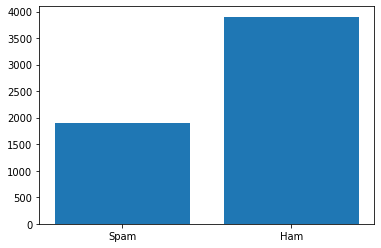

In [ ]:
# Number of spam and non spam emails
print("Spam:",np.count_nonzero(y))
print("Non spam(ham):",len(y)-np.count_nonzero(y))
pied={'Spam':np.count_nonzero(y),'Ham':len(y)-np.count_nonzero(y)}
import matplotlib.pyplot as plt
plt.bar(range(len(pied)), list(pied.values()), align='center')
plt.xticks(range(len(pied)), list(pied.keys()))
plt.show()

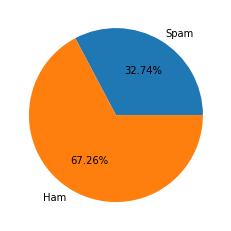

In [ ]:
#Making a pie chart considering percentage of spam and ham emails

labels = list(pied.keys())
values = list(pied.values())
import matplotlib.pyplot as plt

plt.pie(values, labels=labels,autopct="%0.2f%%")
plt.show()

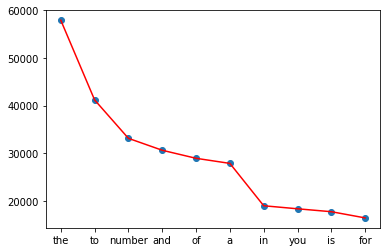

In [ ]:
#Each word in the vocabulary list is a feature for our email vectors. 
#So here we will plot a line graph of the top 10 words(features) of our vocaculary list occuring most frequently in our email.
#This is done to get a basic distribution of most common features of our emails.
words = word_counter.most_common(10)
x_val = [x[0] for x in words]
y_val = [x[1] for x in words]
plt.plot(x_val,y_val,color='red')
plt.scatter(x_val,y_val)

In [ ]:
 #Here we plot the 40 most frequently occuring words in spam emails along with their frequency
 word_counter1=Counter()
for index in range(0,len(y)-1):
  if y[index]==1:
    word_counter1.update(X_preprocessed[index].split())
for word in english_stopwords:
    if word in word_counter1:
        del word_counter1[word]



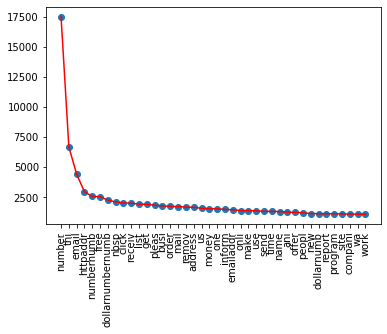

In [ ]:

words1 = word_counter1.most_common(40)
x_val1 = [x[0] for x in words1]
y_val1 = [x[1] for x in words1]
plt.xticks(rotation=90)
plt.plot(x_val1,y_val1,color='red')
plt.scatter(x_val1,y_val1)

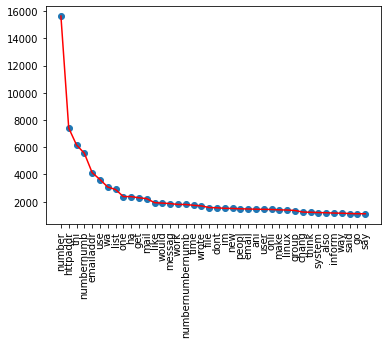

In [ ]:
 #Here we plot the 40 most frequently occuring words in ham emails along with their frequency
 word_counter2=Counter()
for index in range(0,len(y)-1):
  if y[index]==0:
    word_counter2.update(X_preprocessed[index].split())
for word in english_stopwords:
    if word in word_counter2:
        del word_counter2[word]
words2 = word_counter2.most_common(40)
x_val2 = [x[0] for x in words2]
y_val2 = [x[1] for x in words2]
plt.xticks(rotation=90)
plt.plot(x_val2,y_val2,color='red')
plt.scatter(x_val2,y_val2)


In [ ]:
#mean and mode of features
#~~~~~~~
#Mean
print(X_processed.mean(0))
#Mode
from scipy.stats import mode
mode(X_processed, axis=0)[0]



[0.047578   0.01827271 0.02137562 ... 0.02137562 0.02792622 0.        ]


array([[0., 0., 0., ..., 0., 0., 0.]])

##3.2. t-SNE Visualization
t-distributed Stochastic Neighbor Embedding (t-SNE) is a statistical method for visualizing high-dimensional data by giving each datapoint a location in a **two or three-dimensional map**. It is based on Stochastic Neighbor Embedding originally developed by Sam Roweis and Geoffrey Hinton, where Laurens van der Maaten proposed the t-distributed variant. It is a **nonlinear** dimensionality reduction technique well-suited for embedding high-dimensional data **for visualization** in a low-dimensional space of two or three dimensions. Specifically, it models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability.

Although t-SNE is a tool used in Descriptive Data Analysis, I put it up in a separate section since it is a Machine Learning algorithm and also, there are many similar algorithms which are used to create such visualizations. Eg. Maximum Variance Unfolding (MVU), Autoencoders, Locally-Linear Embedding (LLE) etc. Though a problem with many such algorithms such as MVU, LLE are that they don't work well on real life datasets (Autoencoders work really well though.)

But a lot of people just consider t-SNE as a magic blackbox and interpret it in a grossly incorrect manner. [This website](https://distill.pub/2016/misread-tsne/) explains the mis-interpretations of t-SNE very well and how to correctly understand what the visualization means.

**References** :
1. Stochastic Neighbour Embedding Original Paper (SNE) - http://www.cs.toronto.edu/~fritz/absps/sne.pdf
1. t-SNE Original Paper - https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf
1. PCA vs t-SNE - https://stats.stackexchange.com/questions/238538/are-there-cases-where-pca-is-more-suitable-than-t-sne
1. Lec 15: t-SNE by Prof Ali Ghodsi at UWaterloo - https://youtu.be/4GBgqmq0XAY?t=949

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


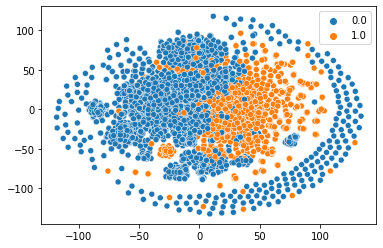

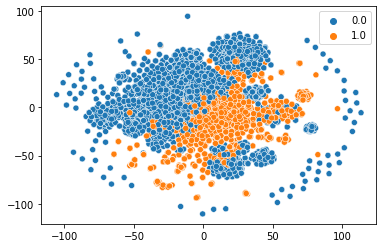

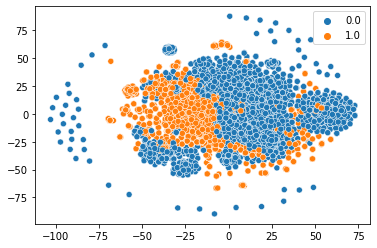

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
test_values=[7,20,40]#perplexity values
for i in test_values:
  m=TSNE(learning_rate=200,perplexity=i)
  tsne_features=m.fit_transform(X_processed)
  plt.figure()
  sns.scatterplot(x=tsne_features[:,0],y=tsne_features[:,1],hue=y)



# **4. Machine Learning & Hyperparameter Tuning**:
We are going to train 4 Machine Learning classifiers and tune their hyperparameters to better fit their dataset. We are going to use the sklearn library to implement the algorithms.

ML Algorithms : 
1. Logistic Regression
1. Support Vector Machines
1. Neural Network (Multi-Layer Perceptron)
1. Random Forests Classifier

Hyperparameters are those variables which are NOT learnt by the model during the training procedure. They are constants during training and define the 'architecture' of the model. Eg. Learning Rate, Number of Iterations in Gradient Descent, Kernel used in SVMs, Max Depth of Tree in Decision Trees, value of K in K-Nearest Neighbours etc. Thus it is essential to use the best hyperparameters to better suit our dataset.

But of course, even before we begin implementing models, we would need to randomly divide our dataset into training, validation (for hyperparameter tuning) and test set.

**Tutorials for Sklearn**:
1. https://towardsdatascience.com/a-beginners-guide-to-scikit-learn-14b7e51d71a4
1. https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/
1. K-Fold Cross Validation - https://youtu.be/rjbkWSTjHzM?t=3848

(We'll be using Stratified K-Fold Cross Validation for Hyperparameter Tuning instead of simple Cross Validation. Will use Sklearn library implementation)

**References (Hyperparameter Tuning & ML Practice)**:
1.  Week 6 - Evaluating a Learning Algorithm. [Machine Learning on Coursera by Andrew Ng ](https://www.coursera.org/learn/machine-learning)
1. Week 6 - Handling Skewed Data. [Machine Learning on Coursera by Andrew Ng ](https://www.coursera.org/learn/machine-learning)
1. Sections 3.2.1 & 3.2.2 https://scikit-learn.org/stable/modules/grid_search.html



In [ ]:
#Code snippet for printing the confusion matrix
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    import pandas as pd
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

In [ ]:
"""Use as many code cells required to implement hyperparameter tuning and fitting ML models"""
#Support Vector Machine(SVM)
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_processed,y,test_size=0.2,random_state=2)
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(SVC(gamma='auto'),{'C':[1,10,20],'kernel':['rbf','linear']},cv=StratifiedKFold(5),return_train_score="False",scoring='f1')
"""Here we apply clf.fit to X_train and y_train so that cross validation splits X_train further in a training and
cross validation set. After training our model and getting the best hyperparameters,we test it on X_test and y_test."""
clf.fit(X_train,y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 10, 20], 'kernel': ['rbf', 'linear']},
             return_train_score='False', scoring='f1')

In [ ]:
print(clf.cv_results_)

clf.best_params_#gives us the best hypertuned parameters

{'mean_fit_time': array([6.99714651, 1.94051228, 3.40487666, 1.81574659, 2.88001895,
       1.68641539]), 'std_fit_time': array([0.05727787, 0.03530896, 0.05006181, 0.06381773, 0.05021488,
       0.08074776]), 'mean_score_time': array([2.01845193, 0.21295533, 0.80252171, 0.19054418, 0.65748439,
       0.179989  ]), 'std_score_time': array([0.03200891, 0.00280451, 0.02391868, 0.01366118, 0.01258261,
       0.01232772]), 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1, 'kernel': 'rbf'}, {'C': 1, 'kernel': 'linear'}, {'C': 10, 'kernel': 'rbf'}, {'C': 10, 'kernel': 'linear'}, {'C': 20, 'kernel': 'rbf'}, {'C': 20, 'kernel': 'linear'}], 'split0_test_score': array

{'C': 20, 'kernel': 'rbf'}

0.9870801033591732


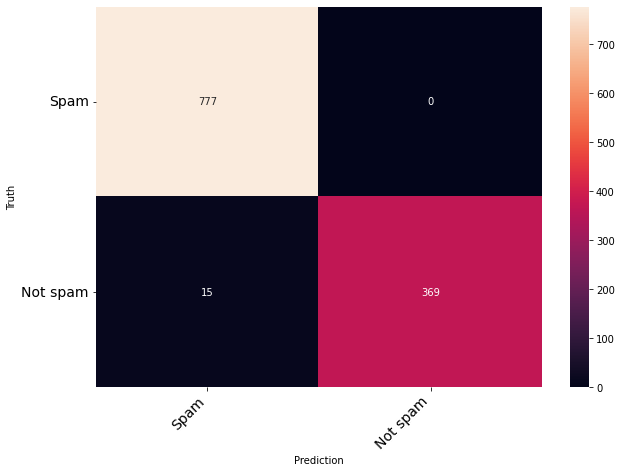

In [ ]:
svm=SVC(gamma='auto',kernel='rbf',C=20)
svm.fit(X_test,y_test)
y_pred=svm.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
cm=confusion_matrix(y_test,y_pred)
print_confusion_matrix(cm,["Spam","Not spam"])
F1=f1_score(y_test,y_pred,average='micro')
print(F1)

In [ ]:
#Logistic Regression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_processed,y,test_size=0.2,random_state=2)
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
clf1=GridSearchCV(LogisticRegression(penalty='l2'),{'C':[0.02,0.04,0.08,1,10],'solver':['lbfgs','liblinear']},cv=StratifiedKFold(5),return_train_score="False",scoring='f1')
clf1.fit(X_train,y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [0.02, 0.04, 0.08, 1, 10],
                         'solver': ['lbfgs', 'liblinear']},
             return_train_score='False', scoring='f1')

In [ ]:
clf1.best_params_

{'C': 1, 'solver': 'lbfgs'}

In [ ]:
clf1.best_score_

0.9793889208256145

0.9870801033591732


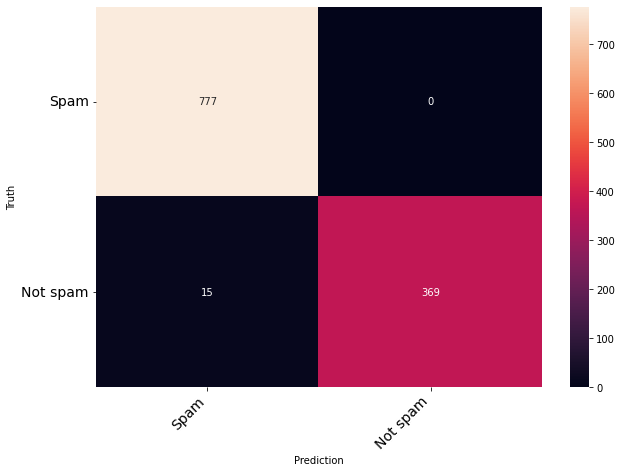

In [ ]:
lr=LogisticRegression(penalty='l2',C=0.1,solver='lbfgs')
lr.fit(X_test,y_test)
y_pred=lr.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
cm=confusion_matrix(y_test,y_pred)
print_confusion_matrix(cm,["Spam","Not spam"])
F1=f1_score(y_test,y_pred,average='micro')
print(F1)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
#RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_processed,y,test_size=0.2,random_state=2)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score)
from sklearn.model_selection import GridSearchCV
clf2=GridSearchCV(RandomForestClassifier(bootstrap=True),{'max_depth':[50,80,90,100],'max_features':[2,3]},cv=StratifiedKFold(5),return_train_score="False",scoring='f1')
clf2.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [50, 80, 90, 100],
                         'max_features': [2, 3]},
             return_train_score='False', scoring='f1')

In [ ]:
clf2.best_score_

0.9517490747189059

In [ ]:
clf2.best_params_

{'max_depth': 100, 'max_features': 3}

0.9991386735572783


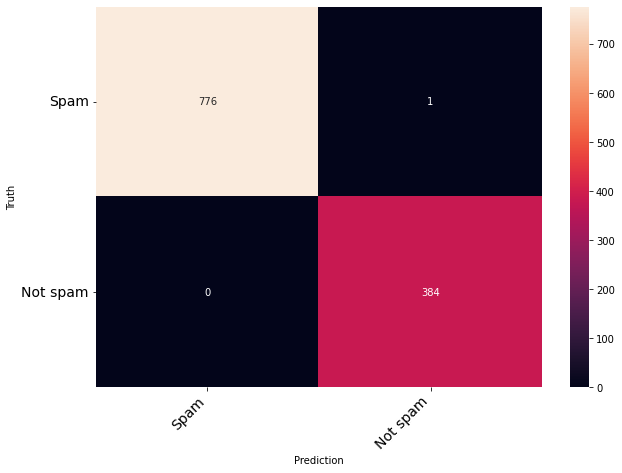

In [ ]:
rf=RandomForestClassifier(bootstrap=True,max_depth=100,max_features=3)
rf.fit(X_test,y_test)
y_pred=rf.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
cm=confusion_matrix(y_test,y_pred)
print_confusion_matrix(cm,["Spam","Not spam"])
F1=f1_score(y_test,y_pred,average='micro')
print(F1)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
#NeuralNetwork
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_processed,y,test_size=0.2,random_state=2)
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
clf3=GridSearchCV(MLPClassifier(max_iter=1000),{'hidden_layer_sizes':[(10,),(20,)],'activation':['tanh','relu'],'alpha':[0.00001,0.00005,0.01,0.05]},cv=StratifiedKFold(5),return_train_score="False",scoring='f1')
clf3.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=MLPClassifier(max_iter=1000),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [1e-05, 5e-05, 0.01, 0.05],
                         'hidden_layer_sizes': [(10,), (20,)]},
             return_train_score='False', scoring='f1')

In [ ]:
clf3.best_params_

{'activation': 'relu', 'alpha': 5e-05, 'hidden_layer_sizes': (10,)}

0.9991386735572783


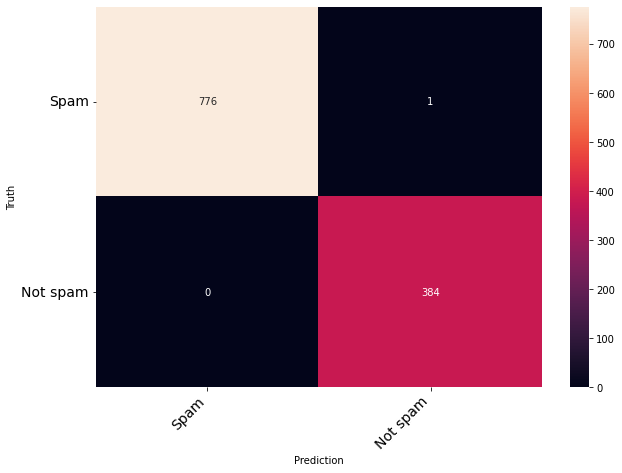

In [ ]:
mlp=MLPClassifier(activation='relu',alpha=0.00005,hidden_layer_sizes=(10,))
mlp.fit(X_test,y_test)
y_pred=mlp.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
cm=confusion_matrix(y_test,y_pred)
print_confusion_matrix(cm,["Spam","Not spam"])
F1=f1_score(y_test,y_pred,average='micro')
print(F1)